In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
data=pd.read_csv('homeprices.csv')
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
price = data.price

In [5]:
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
print('data type of price',type(price))

data type of price <class 'pandas.core.series.Series'>


In [7]:
area = data[['area']]

In [8]:
print("type of area",type(area))

type of area <class 'pandas.core.frame.DataFrame'>


scatter plot


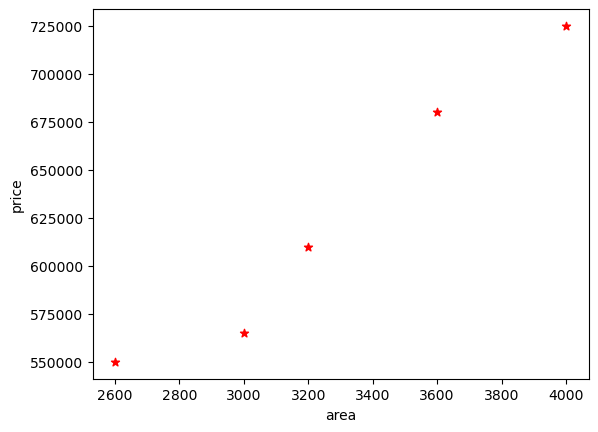

In [18]:
print('scatter plot')
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(data.area,data.price,color='red',marker='*')

In [19]:
regmodel = linear_model.LinearRegression()
regmodel.fit(area,price)
regmodel.score(area,price)

0.9584301138199486

scatter plot - best fit line


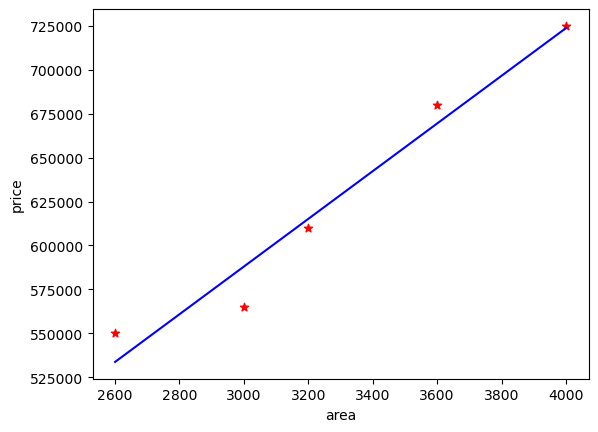

In [20]:
print('scatter plot - best fit line')
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(data.area,data.price,color='red',marker='*')
plt.plot(area,regmodel.predict(area),color='blue')

In [21]:
print("predict price for 3000 sq ft")
regmodel.predict([[3000]])

predict price for 3000 sq ft


C:\Users\Raghu Prasad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [24]:
print("predict price for 5000 sq ft")
regmodel.predict([[5000]])

predict price for 5000 sq ft


C:\Users\Raghu Prasad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [26]:
print("co-efficient")
regmodel.coef_


co-efficient


array([135.78767123])

In [28]:
print("intercept")
regmodel.intercept_

intercept


180616.43835616432

In [29]:
print("cross check y=mx+c")
3000*regmodel.coef_+regmodel.intercept_

cross check y=mx+c


array([587979.45205479])

In [33]:
print("testing ")
testdata = pd.read_csv("areas.csv")
testdata

testing 


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [34]:
predictedprice =regmodel.predict(testdata)
predictedprice

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [35]:
testdata['price']=predictedprice
testdata

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [36]:
testdata.to_csv("predictedprice-15-05-2023.csv")